In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import feature_extraction
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [126]:
# Load the tweets into a DataFrame
tweets_df = pd.read_csv("Data.Original.1900")

In [127]:
tweets_df

,City,Lang,Time,Text,Geohash,Country,Region
0,pruzhany,en,2021-12-06 15:13:17,@WarcraftDevs - demon spikes reflect x % of in...,u936uxwkybu2,by,europe_east
1,lumphat,und,2021-12-06 15:25:06,@phuonganhh21 e,w6khf3wghq2s,kh,asia_southeast
2,tsiombe,fr,2021-12-06 15:50:41,Eh le poto il est à l’aise avec sa question 💀💀...,m5824frby6pt,mg,africa_sub
3,boruny,und,2021-12-06 15:55:03,@SobolLubov #ОскарПутину #Оскар #Путинизм #Нав...,u9dt48j9wb99,by,europe_east
4,vilkaviskis,en,2021-12-06 17:15:42,Top rated project! @polygen_io and #Launchpad ...,u98quj5919n4,lt,europe_east
...,...,...,...,...,...,...,...
12744328,soka,und,2021-12-21 16:43:39,https://t.co/cDu892Apj6,xn77v2fkpxu8,jp,asia_east
12744329,soka,ja,2021-12-21 16:43:39,今日だけで4玉食べて冷凍庫を空にした。引越し前うどん。 https://t.co/zG57D...,xn77v2fkpxu8,jp,asia_east
12744330,pedro betancourt,ja,2021-12-21 16:43:39,是我了 https://t.co/KPTyf0hJCO,dhn1q1q7ttq1,cu,america_central
12744331,soka,und,2021-12-21 16:43:40,🙇‍♀️💕💕 https://t.co/orOVDvtL85,xn77v2fkpxu8,jp,asia_east


In [128]:
len(tweets_df)
tweets_df = tweets_df.dropna()

tweets_df = tweets_df[:200000]

In [202]:
tweets_df

,City,Lang,Time,Text,Geohash,Country,Region
0,pruzhany,en,2021-12-06 15:13:17,@WarcraftDevs - demon spikes reflect x % of in...,u936uxwkybu2,by,europe_east
1,lumphat,und,2021-12-06 15:25:06,@phuonganhh21 e,w6khf3wghq2s,kh,asia_southeast
2,tsiombe,fr,2021-12-06 15:50:41,Eh le poto il est à l’aise avec sa question 💀💀...,m5824frby6pt,mg,africa_sub
3,boruny,und,2021-12-06 15:55:03,@SobolLubov #ОскарПутину #Оскар #Путинизм #Нав...,u9dt48j9wb99,by,europe_east
4,vilkaviskis,en,2021-12-06 17:15:42,Top rated project! @polygen_io and #Launchpad ...,u98quj5919n4,lt,europe_east
...,...,...,...,...,...,...,...
200045,purmamarca,es,2021-12-15 13:29:32,@_Vignet @JuanDeFor11 @lifesdaijobu @walkinwou...,6ec2vzkrrf42,ar,america_south
200046,kiseljak,und,2021-12-15 13:29:32,Neko sad da mi kaže da biram iste sekunde drža...,srucgr7p8gen,ba,europe_east
200047,cabimas,es,2021-12-15 13:29:32,Se viene duro trabajo y dedicación este 2022,d3v5njwe8yur,ve,america_south
200048,la massana,tl,2021-12-15 13:29:32,ka smart ni scottie boo oy grrr! maka gigil 🥰,sp9443p49brg,ad,europe_west


In [203]:
import re
import emoji


def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text, flags=re.MULTILINE)

    # Remove mentions
    text = re.sub(r"@\w+", "", text)

    return text


def get_emojis(text):
    emojis = emoji.analyze(text)
    return list(x[0] for x in emojis)


# Only look at tweets which contain at least 1 emoji
tweets_with_emojis = tweets_df[
    tweets_df["Text"].apply(lambda x: emoji.emoji_count(x) > 0)
]

# Apply the clean function to the 'Text' column
tweets_with_emojis["CleanedText"] = tweets_with_emojis["Text"].apply(clean_text)

# Get just emojis
tweets_with_emojis["Emojis"] = tweets_with_emojis["Text"].apply(
    lambda text: "".join(get_emojis(text))
)

/var/folders/7l/7xyqb1qn2516ktkslhs8yly00000gn/T/ipykernel_87022/4281959839.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_with_emojis["CleanedText"] = tweets_with_emojis["Text"].apply(clean_text)
/var/folders/7l/7xyqb1qn2516ktkslhs8yly00000gn/T/ipykernel_87022/4281959839.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_with_emojis["Emojis"] = tweets_with_emojis["Text"].apply(


In [204]:
tweets_with_emojis

,City,Lang,Time,Text,Geohash,Country,Region,CleanedText,Emojis
2,tsiombe,fr,2021-12-06 15:50:41,Eh le poto il est à l’aise avec sa question 💀💀...,m5824frby6pt,mg,africa_sub,Eh le poto il est à l’aise avec sa question 💀💀,💀💀
11,hobyo,en,2021-12-06 23:04:04,@M0zark0 😭😭😭😭😭 ur ugly for that wallahi,t0fw2npnp7hn,so,africa_north,😭😭😭😭😭 ur ugly for that wallahi,😭😭😭😭😭
17,ayny,es,2021-12-06 23:19:23,Hacer cosas de novios sin ser novios ♥️,tx08psjenf21,tj,asia_central,Hacer cosas de novios sin ser novios ♥️,♥️
18,aflou,ar,2021-12-06 23:23:17,@beINSPORTS_news انا جزائري لا كن أرى أن جزائر...,sn16pc6ddver,dz,africa_north,انا جزائري لا كن أرى أن جزائري افضل في اسوء ح...,😂
21,villa yapacani,en,2021-12-06 23:28:34,@andalechuey Lmaooo i felt that shit 🤣💀,6sft52mvxsct,bo,america_south,Lmaooo i felt that shit 🤣💀,🤣💀
...,...,...,...,...,...,...,...,...,...
200011,oltintopkan,ja,2021-12-15 13:29:30,@kaoyuta2 どうしよう😂今更ながらポチッとしようかと思ってみたが何があるんか分からへん😂,tx1rpxnwrc4m,tj,asia_central,どうしよう😂今更ながらポチッとしようかと思ってみたが何があるんか分からへん😂,😂😂
200024,uusikaupunki,ja,2021-12-15 13:29:31,@zaza_pub あそゆことか！ 素直に受け取ったわ😂,u6z1zk71smrx,fi,europe_west,あそゆことか！ 素直に受け取ったわ😂,😂
200027,belchatow,pl,2021-12-15 13:29:31,@Dycha_3 tylko żeby nie skończyło się jak we W...,u3ju1p4882sy,pl,europe_east,tylko żeby nie skończyło się jak we Wrocku 😄,😄
200031,nenagh bridge,en,2021-12-15 13:29:31,"@kellyanitam Very exciting, massive congrats 👏",gc6hv6zfp1pv,ie,europe_west,"Very exciting, massive congrats 👏",👏


In [206]:
# Clustering function to be used for iterative clustering
def cluster(stopwords, data_df, cluster_prefix="Main"):

    # Now make a new vectorizer with those stopwords excluded; this version will use TF-IDF feature weighting
    features = feature_extraction.text.TfidfVectorizer(
        input="content",
        encoding="utf-8",
        decode_error="ignore",
        lowercase=True,
        tokenizer=None,
        ngram_range=(1, 2),  
        analyzer="char",
        max_features=10000,
    )

    # Sklearn first fits then transforms
    features.fit(data_df.loc[:, "CleanedText"].values)

    # Now extract the content features (with phrases, without stopwords)
    x = features.transform(data_df.loc[:, "CleanedText"].values)
    print(x)
    print(x.shape)

    # Cluster documents by content
    cluster = KMeans(
        n_clusters=10,  # The number of topics we'll get
        init="k-means++",
        n_init="auto",
        max_iter=30000,
        algorithm="lloyd",
    )

    # Perform clustering
    cluster.fit(x)

    # Add cluster labels to dataframe
    data_df.loc[:, "Cluster"] = [cluster_prefix + "_" + str(x) for x in cluster.labels_]

    # Sort by cluster 
    data_df.sort_values("Cluster", inplace=True)
    print(data_df)
    print(data_df.value_counts("Cluster"))

    # Get the biggest cluster for further splitting
    most_frequent = data_df.value_counts("Cluster").index[0]

    # Separate the main cluster from other clusters
    main_topic = data_df[data_df.loc[:, "Cluster"] == most_frequent]
    other_topics = data_df[data_df.loc[:, "Cluster"] != most_frequent]

    # Send back the two dataframes
    return main_topic, other_topics, most_frequent

In [210]:
# Create a loop to continue clustering until the largest category is not too big
main_cluster = tweets_with_emojis  # Initialize main topic
cluster_prefix = "Cluster"  # Start with root topics
holder = []
starting_length = len(tweets_with_emojis)
counter = 0
stopwords = []

while True:
    # Run clustering
    counter += 1
    main_cluster, other_clusters, most_frequent = cluster(
        stopwords, main_cluster, cluster_prefix
    )
    cluster_prefix = str(most_frequent)

    # Check stopping conditions, no cluster over 20% of tweets
    if len(main_cluster) / len(tweets_with_emojis) < 0.20:
        holder.append(other_clusters)
        holder.append(main_cluster)
        break

    # Keep going
    else:
        holder.append(other_clusters)
        print(
            "Continuing after round " + str(counter),
            "Current: ",
            len(main_cluster),
            "Total: ",
            starting_length,
        )

/Users/owenhayes/opt/anaconda3/envs/ling413/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/owenhayes/opt/anaconda3/envs/ling413/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:555: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


  (0, 9613)	0.19234928770008441
  (0, 9611)	0.32659052704987324
  (0, 7673)	0.17763024606040553
  (0, 7656)	0.2152835188654618
  (0, 7654)	0.18888690804993344
  (0, 7263)	0.19576550470499665
  (0, 7261)	0.13985258055233482
  (0, 7219)	0.13232939963008294
  (0, 7167)	0.13388261260656428
  (0, 7138)	0.2251943484781439
  (0, 7137)	0.12464509909612899
  (0, 7081)	0.12398798658306605
  (0, 7065)	0.17217592293365708
  (0, 7057)	0.12881029742419814
  (0, 7048)	0.179757075014277
  (0, 7036)	0.1250480166816844
  (0, 6978)	0.2036260096935193
  (0, 6968)	0.12223683599518727
  (0, 6959)	0.1403539953324806
  (0, 6949)	0.1250480166816844
  (0, 6923)	0.16850797236094325
  (0, 6898)	0.12161120113299954
  (0, 6848)	0.16172786041188653
  (0, 6836)	0.12012761644811058
  (0, 6696)	0.12998314487569068
  :	:
  (44261, 1785)	0.1266096487937945
  (44261, 1761)	0.10687813302072857
  (44261, 1726)	0.11743358173598595
  (44261, 1719)	0.19400671631535207
  (44261, 1711)	0.19998365682323693
  (44261, 1694)	0.14111

/var/folders/7l/7xyqb1qn2516ktkslhs8yly00000gn/T/ipykernel_87022/4240225524.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.sort_values("Cluster", inplace=True)
/Users/owenhayes/opt/anaconda3/envs/ling413/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/owenhayes/opt/anaconda3/envs/ling413/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:555: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


                   City Lang                 Time  \
34545     beaufort west  und  2021-12-14 11:52:44   
198142          jalingo  und  2021-12-15 13:27:35   
30258             gyula  und  2021-12-14 06:14:17   
89460            bentiu  und  2021-12-15 09:40:07   
47296   karmah an nuzul  und  2021-12-14 19:53:08   
...                 ...  ...                  ...   
26081              gizo   pt  2021-12-13 21:33:18   
189648             doha   en  2021-12-15 13:22:35   
24025          marsabit   tr  2021-12-13 17:52:11   
199053           bamako   ht  2021-12-15 13:28:34   
103224    parnu-jaagupi   tl  2021-12-15 11:10:37   

                                                     Text       Geohash  \
34545                         😂😂😂 https://t.co/0QREITnDRL  kd0pcyuetffm   
198142                            @unclebayotics Ps2 😂😂😂😂  s384d9hvnt35   
30258                                      @semracisse 😂😂  u2r1kk65cw71   
89460                     @Seyfullah_Y @cehhennem_lik 😂😂😂  s9th

/var/folders/7l/7xyqb1qn2516ktkslhs8yly00000gn/T/ipykernel_87022/4240225524.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.sort_values("Cluster", inplace=True)


In [364]:
list(tweets_with_emojis['Cluster'].unique())

['Cluster_0',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4',
 'Cluster_5',
 'Cluster_6_0',
 'Cluster_6_1',
 'Cluster_6_2',
 'Cluster_6_3',
 'Cluster_6_4',
 'Cluster_6_5',
 'Cluster_6_6',
 'Cluster_6_7',
 'Cluster_6_8',
 'Cluster_6_9',
 'Cluster_7',
 'Cluster_8',
 'Cluster_9']

In [212]:
# Merge
tweets_with_emojis = pd.concat(holder)
tweets_with_emojis.sort_values("Cluster", inplace=True)
print(tweets_with_emojis)
print(tweets_with_emojis.value_counts("Cluster"))

                      City Lang                 Time  \
34545        beaufort west  und  2021-12-14 11:52:44   
133124  san juan de flores   pt  2021-12-15 12:39:35   
37586              kiomboi  und  2021-12-14 14:16:47   
119383             geelong  und  2021-12-15 12:10:49   
183776          bang kruai  und  2021-12-15 13:19:44   
...                    ...  ...                  ...   
169128       los rastrojos   es  2021-12-15 13:08:58   
179933               kilis   tr  2021-12-15 13:17:34   
183282            zedelgem   tr  2021-12-15 13:19:31   
91904               korsor   en  2021-12-15 10:00:25   
41030               bokoro   en  2021-12-14 16:28:05   

                                                     Text       Geohash  \
34545                         😂😂😂 https://t.co/0QREITnDRL  kd0pcyuetffm   
133124                @Yakuza3t0 @jennimfunes Contexto 😂😂  d4d15t0m277m   
37586                       @MartinMshana1 @kan_gren 😂😂😂😂  kz0rwp30c7dt   
119383                     

In [230]:
tweets_with_emojis[tweets_with_emojis['Cluster']=='Cluster_6_3'][30:40]

,City,Lang,Time,Text,Geohash,Country,Region,CleanedText,Emojis,Cluster
7971,kushk,ko,2021-12-11 10:34:06,귀여워💙 https://t.co/0rZJQn3mlS https://t.co/FFUn...,tmuj3v2eukgr,af,asia_central,귀여워💙,💙,Cluster_6_3
1591,darhan,ru,2021-12-08 10:11:38,@else_java Яг 😊,y2g3d2f8ex3c,mn,asia_east,Яг 😊,😊,Cluster_6_3
195122,yaring,und,2021-12-15 13:25:26,@siriwiz0 😊💓😁💓,w30p495speks,th,asia_southeast,😊💓😁💓,😊💓😁💓,Cluster_6_3
194257,doha,und,2021-12-15 13:25:00,@IDQATARI2 😊😊😊,thkxuem3t8q4,qa,middle_east,😊😊😊,😊😊😊,Cluster_6_3
133960,tlemcen,und,2021-12-15 12:40:55,💙🥶 https://t.co/1GR5TgNxry,eypn6j6mn28f,dz,africa_north,💙🥶,💙🥶,Cluster_6_3
106706,ucar,und,2021-12-15 11:27:00,@narrri29 😊,tp1ys2hsqsf8,az,asia_central,😊,😊,Cluster_6_3
168540,pimentel,und,2021-12-15 13:08:35,@lujan_edson @MauricioCasasL 😊,6nz1j53twbvy,pe,america_south,😊,😊,Cluster_6_3
188785,kasur,und,2021-12-15 13:22:10,@YehTuNobodyHai 😊☺,ttscn06mhzzr,pk,asia_south,😊☺,😊☺,Cluster_6_3
5439,sindand,ko,2021-12-10 12:35:48,굿나잇 싸랑해💙 https://t.co/ec8MqHxh2V,tmujqn0fwcvv,af,asia_central,굿나잇 싸랑해💙,💙,Cluster_6_3
182130,kohat,und,2021-12-15 13:19:02,@GuruGlorious 💙,ttfz1dqdhknp,pk,asia_south,💙,💙,Cluster_6_3


In [279]:
tweets_with_emojis.value_counts("Cluster").sort_index()

Cluster
Cluster_0      1738
Cluster_1      5748
Cluster_2      3459
Cluster_3      1002
Cluster_4      1170
Cluster_5      6130
Cluster_6_0      25
Cluster_6_1     487
Cluster_6_2     101
Cluster_6_3     190
Cluster_6_4    1419
Cluster_6_5     612
Cluster_6_6     180
Cluster_6_7    1555
Cluster_6_8    5808
Cluster_6_9     230
Cluster_7      4371
Cluster_8       808
Cluster_9      9229
Name: count, dtype: int64

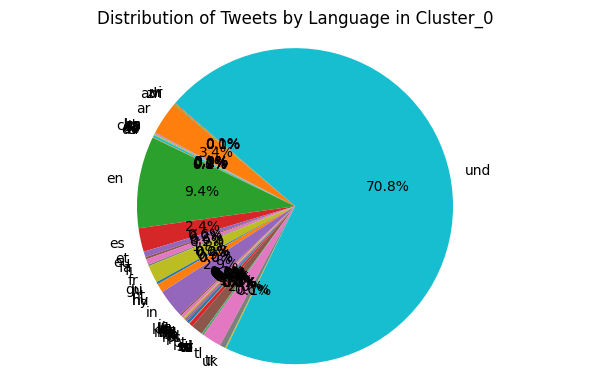

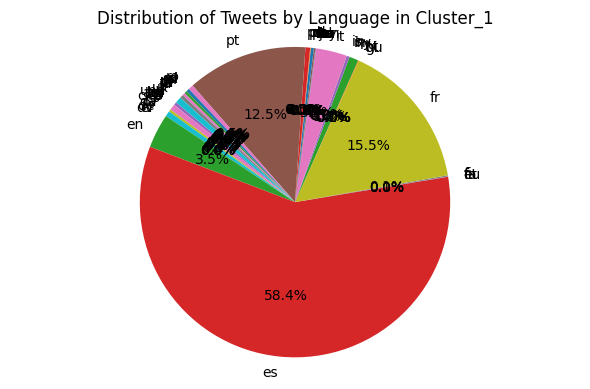

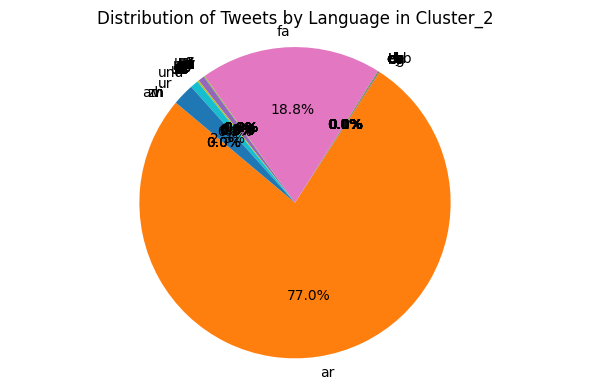

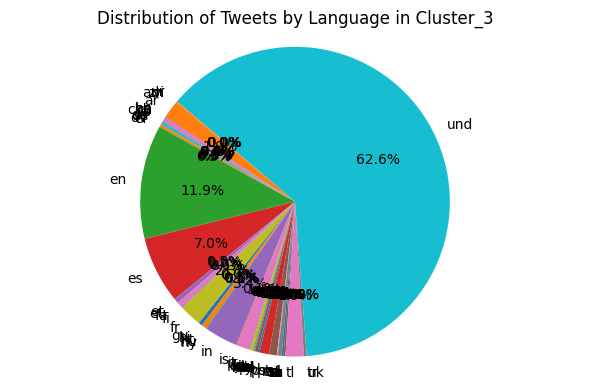

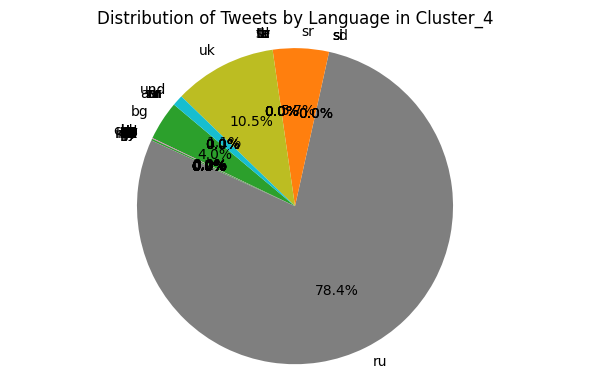

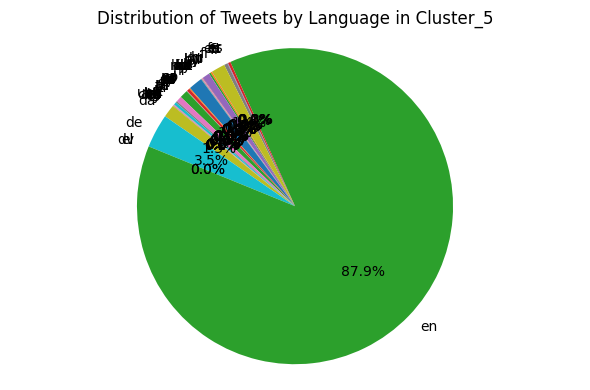

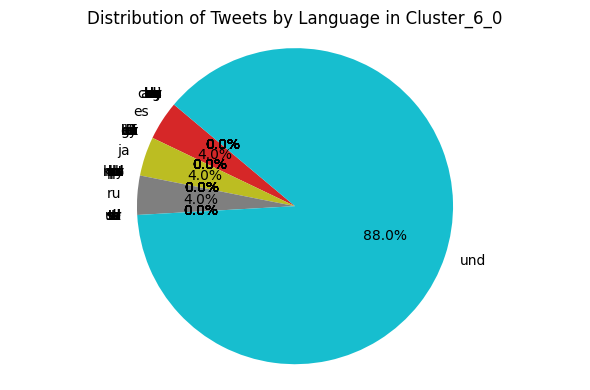

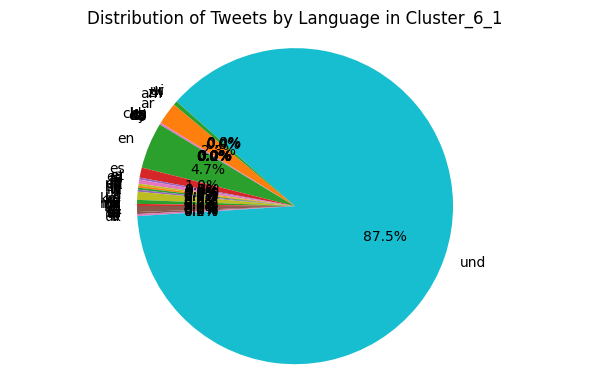

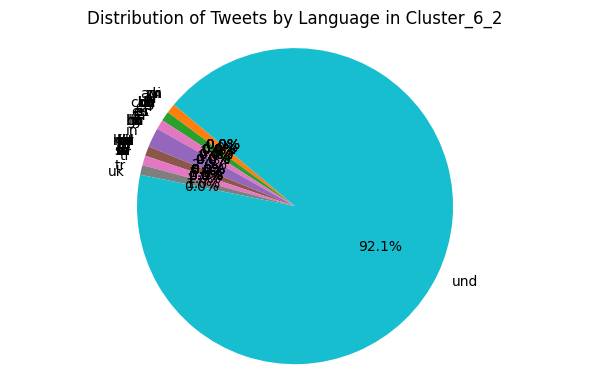

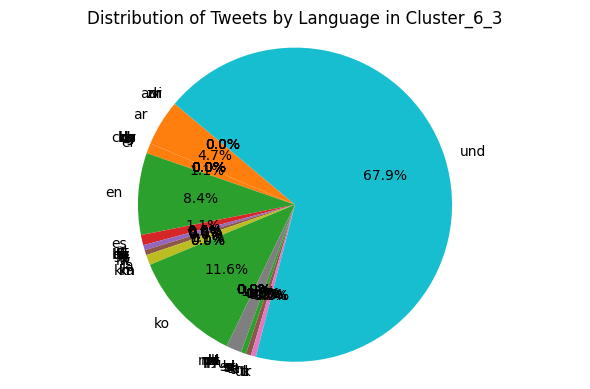

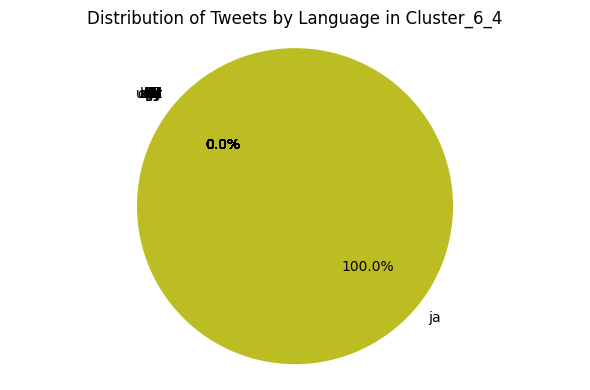

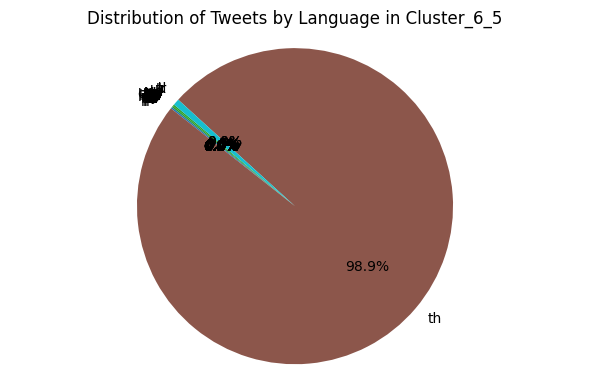

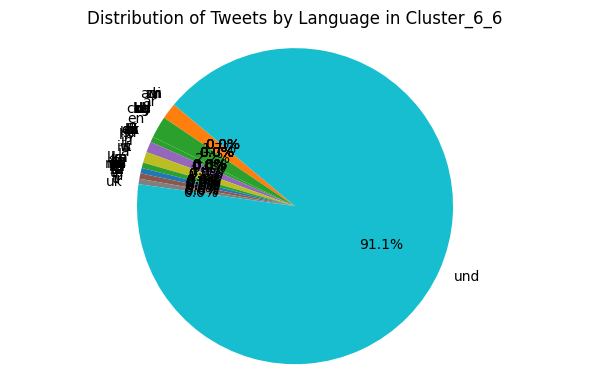

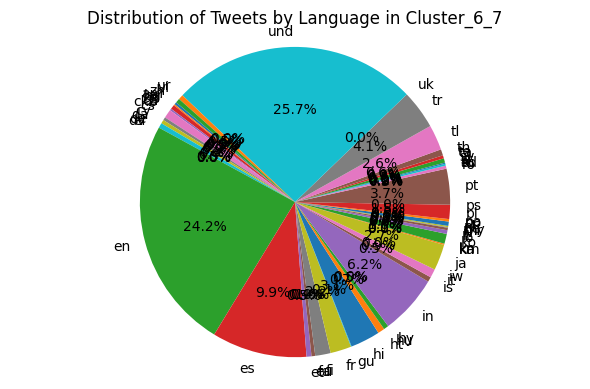

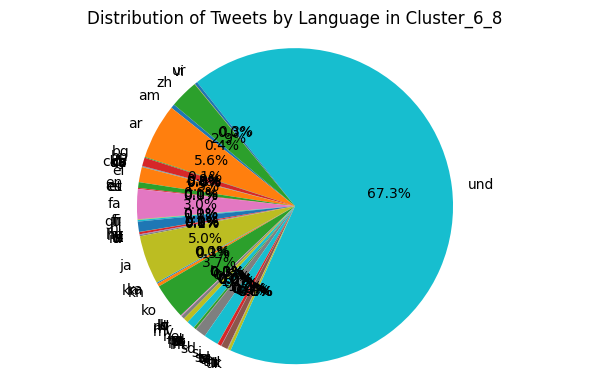

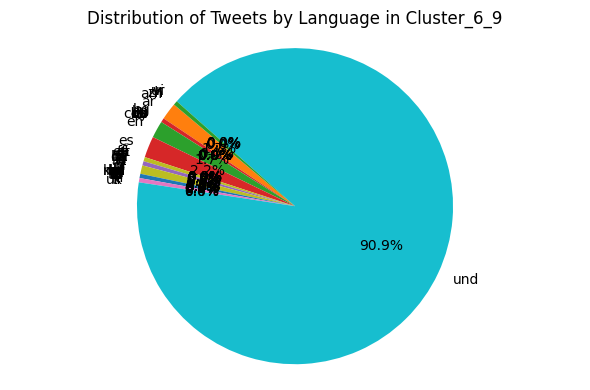

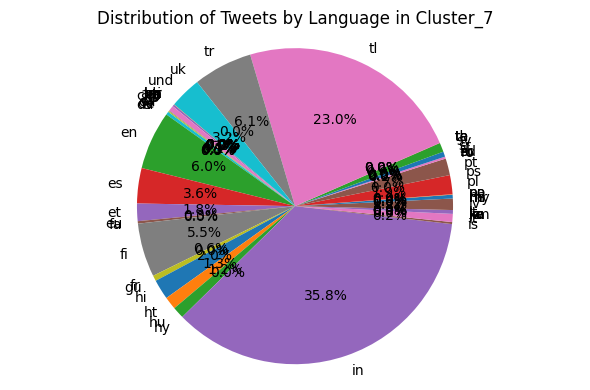

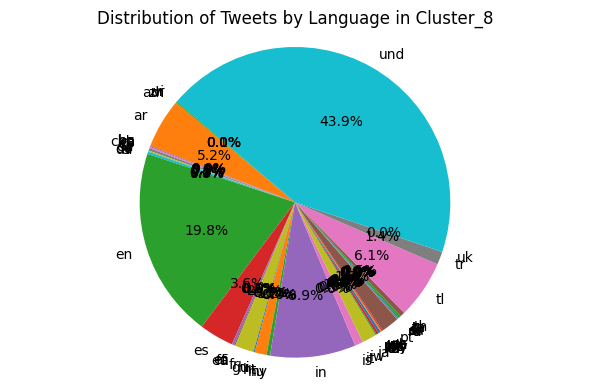

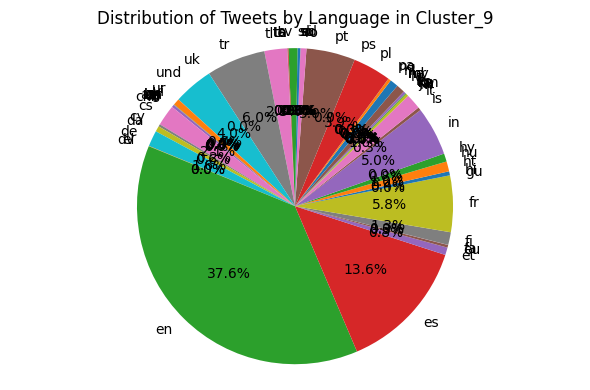

In [351]:
# Group by Cluster and Lang, count occurrences, and unstack to pivot data
grouped = tweets_with_emojis.groupby(["Cluster", "Lang"]).size().unstack(fill_value=0)

# Plot each cluster separately
for cluster in grouped.index:
    plt.figure(figsize=(6,4))
    cluster_data = grouped.loc[cluster]
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Tweets by Language in {cluster}')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f'distr_of_tweets_by_lang/{cluster}')
    plt.show()

In [365]:
# Group by cluster and aggregate emojis
grouped_by_cluster = tweets_with_emojis.groupby('Cluster')['Emojis'].apply(lambda x: ' '.join(x)).reset_index()

def count_emojis(text):
    emoji_count = {}
    for emoji_char in text:
        # Ignore these: \ufe0f = variation selector; \u200d = zero width joiner
        if emoji_char == '' or emoji_char == ' ' \
            or emoji_char == '\ufe0f' \
            or emoji_char == '\u200d':
            continue
        if emoji_char in emoji_count:
            emoji_count[emoji_char] += 1
        else:
            emoji_count[emoji_char] = 1
    return emoji_count

# Find the top 5 emojis for each topic
for cluster, emojis in zip(grouped_by_cluster['Cluster'], grouped_by_cluster['Emojis']):
    emoji_count = count_emojis(emojis)
    sorted_emojis = sorted(emoji_count.items(), key=lambda x: x[1], reverse=True)

    top_5 = sorted_emojis[:5]
    
    print(f"{cluster}")
    for emoji_char, count in top_5:
        print(f"{emoji_char} ({emoji.demojize(emoji_char)}) = {count}")
    print()

Cluster_0
😂 (:face_with_tears_of_joy:) = 6449
😭 (:loudly_crying_face:) = 65
🤣 (:rolling_on_the_floor_laughing:) = 59
💔 (:broken_heart:) = 28
💀 (:skull:) = 20

Cluster_1
😂 (:face_with_tears_of_joy:) = 868
🤣 (:rolling_on_the_floor_laughing:) = 575
😭 (:loudly_crying_face:) = 412
❤ (:red_heart:) = 330
🥺 (:pleading_face:) = 239

Cluster_2
😂 (:face_with_tears_of_joy:) = 1444
❤ (:red_heart:) = 437
🤣 (:rolling_on_the_floor_laughing:) = 273
😭 (:loudly_crying_face:) = 242
🇩 (🇩) = 168

Cluster_3
🤣 (:rolling_on_the_floor_laughing:) = 4246
😂 (:face_with_tears_of_joy:) = 103
😭 (:loudly_crying_face:) = 23
😝 (:squinting_face_with_tongue:) = 15
😅 (:grinning_face_with_sweat:) = 13

Cluster_4
😂 (:face_with_tears_of_joy:) = 187
🤣 (:rolling_on_the_floor_laughing:) = 146
❤ (:red_heart:) = 57
😅 (:grinning_face_with_sweat:) = 55
😁 (:beaming_face_with_smiling_eyes:) = 50

Cluster_5
😂 (:face_with_tears_of_joy:) = 1472
🤣 (:rolling_on_the_floor_laughing:) = 637
😭 (:loudly_crying_face:) = 603
❤ (:red_heart:) = 393

In [359]:
# Group by cluster and aggregate emojis
grouped_by_cluster = tweets_with_emojis.groupby('Cluster')['Emojis'].apply(lambda x: ' '.join(x)).reset_index()

# Find the top 3 emojis for each topic
for cluster, emojis in zip(grouped_by_cluster['Cluster'], grouped_by_cluster['Emojis']):
    emoji_count = count_emojis(emojis)
    sorted_emojis = sorted(emoji_count.items(), key=lambda x: x[1], reverse=True)
    # print(sorted_emojis)
    top_5 = sorted_emojis[:5]
    print(f"{cluster}: ", end="")
    for emoji_char, count in top_5:
        print(f"{emoji_char} = {count}, ", end="")
    print()

Cluster_0: 😂 = 6449, 😭 = 65, 🤣 = 59, 💔 = 28, 💀 = 20, 
Cluster_1: 😂 = 868, 🤣 = 575, 😭 = 412, ❤ = 330, 🥺 = 239, 
Cluster_2: 😂 = 1444, ❤ = 437, 🤣 = 273, 😭 = 242, 🇩 = 168, 
Cluster_3: 🤣 = 4246, 😂 = 103, 😭 = 23, 😝 = 15, 😅 = 13, 
Cluster_4: 😂 = 187, 🤣 = 146, ❤ = 57, 😅 = 55, 😁 = 50, 
Cluster_5: 😂 = 1472, 🤣 = 637, 😭 = 603, ❤ = 393, 🙏 = 212, 
Cluster_6_0: 👋 = 47, 🤗 = 5, 🏻 = 5, 😊 = 4, 👌 = 3, 
Cluster_6_1: ❤ = 1077, 🔥 = 39, 😍 = 25, 🍀 = 20, 🙏 = 19, 
Cluster_6_2: 😅 = 234, 😂 = 5, 👍 = 5, 🤣 = 3, 😬 = 2, 
Cluster_6_3: 💙 = 277, 😊 = 122, 💚 = 101, 🧡 = 74, 💛 = 73, 
Cluster_6_4: ✨ = 172, 😭 = 133, 🥺 = 109, 😂 = 99, ☺ = 79, 
Cluster_6_5: 😂 = 89, 🥺 = 75, 🤣 = 65, 😭 = 50, 😁 = 48, 
Cluster_6_6: 👍 = 364, 🔥 = 40, 🏻 = 34, 🏽 = 17, 🏼 = 15, 
Cluster_6_7: 🔥 = 210, ❤ = 187, 🏻 = 172, 🙏 = 151, 🥺 = 115, 
Cluster_6_8: ⬜ = 777, 😂 = 570, 🏻 = 541, 🔥 = 519, 🙏 = 499, 
Cluster_6_9: 😍 = 548, ❤ = 20, 🔥 = 17, 🤤 = 12, 😘 = 6, 
Cluster_7: 😂 = 1206, 😭 = 822, 🤣 = 478, 🙏 = 182, ❤ = 157, 
Cluster_8: 😭 = 7445, 😂 = 72, 💔 = 31, 🥺 = 13, 🤣 = 13, 


In [358]:
# Cluster-Cluster comparisons

# Fit the feature set
features = feature_extraction.text.TfidfVectorizer(
    input="content",
    encoding="utf-8",
    decode_error="ignore",
    lowercase=True,
    tokenizer=None,
    ngram_range=(1, 2),
    analyzer="char",
    max_features=10000,
)

features.fit(tweets_with_emojis["CleanedText"])

# Get unique clusters from the 'Cluster' column
clusters = tweets_with_emojis['Cluster'].unique()

for cluster in clusters:
    print("Cluster:", cluster)
    
    # Select data for the current cluster
    cluster_data = tweets_with_emojis[tweets_with_emojis['Cluster'] == cluster]
    
    holder = []
    distances = []
    for i in range(1000):
        # Choose random sample from the cluster
        sample1 = cluster_data.sample(n=1)
        sample1_text = sample1['CleanedText'].values[0]
        sample1_lang = sample1['Lang'].values[0]

        # Choose random sample from the cluster 
        sample2 = cluster_data.sample(n=1)
        sample2_text = sample2['CleanedText'].values[0]
        sample2_lang = sample2['Lang'].values[0]
        
        # Get features for samples
        features_sample1 = features.transform([sample1_text])
        features_sample2 = features.transform([sample2_text])
        
        # Find similarity
        similarity = euclidean_distances(features_sample1, features_sample2)[0][0]

        distances.append(similarity)
        
        # Same or different
        status = "Same" if sample1_lang == sample2_lang else "Different"

        comparison = "/".join(sorted([sample1_lang, sample2_lang]))
        
        holder.append([comparison, similarity, status])

    # Done with loop, make dataframe
    results_df = pd.DataFrame(holder, columns=["LanguagePair", "Distance", "Status"])
    print(results_df)
    
    # Scale similarity results
    scaler = StandardScaler()
    results_df.loc[:, "Distance"] = scaler.fit_transform(
        results_df.loc[:, "Distance"].values.reshape(-1, 1)
    )
    print(results_df)

    scaled_distances = results_df["Distance"].values
    mean_distance = np.mean(scaled_distances)
    median_distance = np.median(scaled_distances)
    min_distance = np.min(scaled_distances)
    max_distance = np.max(scaled_distances)
    
    print("Mean Distance (scaled):", mean_distance)
    print("Median Distance (scaled):", median_distance)
    print("Minimum Distance (scaled):", min_distance)
    print("Maximum Distance (scaled):", max_distance)
    print()

    # Make graph
    figure(figsize=(13, 5))
    ax = sns.stripplot(
        data=results_df, x="LanguagePair", y="Distance", hue="Status", jitter=True, size=3, hue_order=["Same", "Different"]
    )
    plt.xticks(rotation=45)
    ax.set_ylim([-3, 3])
    plt.title(f"Distances within {cluster}")
    plt.savefig(f"distances_within_clusters/{cluster}.png", bbox_inches="tight")
    plt.clf()

Cluster: Cluster_0
    LanguagePair  Distance     Status
0        und/und  0.386985       Same
1         en/und  0.903089  Different
2         es/und  1.230092  Different
3         eu/und  0.589889  Different
4        und/und  0.771283       Same
..           ...       ...        ...
995       es/und  1.262596  Different
996      und/und  0.492499       Same
997       tr/und  0.880189  Different
998      und/und  0.211550       Same
999       es/und  1.017792  Different

[1000 rows x 3 columns]
    LanguagePair  Distance     Status
0        und/und -1.187211       Same
1         en/und  0.365257  Different
2         es/und  1.348899  Different
3         eu/und -0.576864  Different
4        und/und -0.031224       Same
..           ...       ...        ...
995       es/und  1.446672  Different
996      und/und -0.869819       Same
997       tr/und  0.296371  Different
998      und/und -1.714929       Same
999       es/und  0.710290  Different

[1000 rows x 3 columns]
Mean Distance (scal

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

In [320]:
tweets_with_emojis[tweets_with_emojis['Cluster']=='Cluster_6_5'][['Lang', 'CleanedText', 'Emojis', 'Cluster']]

,Lang,CleanedText,Emojis,Cluster
196041,th,แมะเอกสู้ๆนะคร้าบ✌️✌️,✌️✌️,Cluster_6_5
127091,th,โดนทุบคาชุดกาวน์ 🤣,🤣,Cluster_6_5
176141,th,พร้อมเป็นทัพเสริมครับลูกพี่ 😁,😁,Cluster_6_5
193165,th,ตกใจนึกว่าป๊าเปิด สรุปโฆษณา😭😭,😭😭,Cluster_6_5
183602,th,เหมือนได้วนดู ใต้เท้าลู่อีกรอบ เพลินเลย 🥰🥰 #W...,🥰🥰,Cluster_6_5
...,...,...,...,...
141098,th,ควง2ไปเลยจ้า 😂😂😂,😂😂😂,Cluster_6_5
145747,th,พรุ่งนี้เลยไหมครับ แค่คิดก็หิวเงินแล้ว 😄,😄,Cluster_6_5
108605,th,ใช่มั้ยละ😛,😛,Cluster_6_5
112179,th,💟 กรณีแยกเป็นคู่แยกได้ค่ะ คัตจัง เดกุ อม1:1 💟 ...,💟💟🙇🏻‍♀️,Cluster_6_5
